## This notebook answers the Question 1 - Which type of complaints Department of Housing Preservation and Development should focus first ?

# <font color="maroon">Prepare Libraries</font>

In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (18.1)


In [2]:
!pip install missingno

In [3]:
!pip install TextBlob

In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display
%matplotlib inline

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

# <font color="maroon">Read Data</font>

# <font color="blue" size=4>Pull 311 Complaint data from the file you have stored in the Cloud object store. </font>

In [4]:
# The code was removed by Watson Studio for sharing.

In [7]:
client_4583a2827cdd4084aebc758e0b87cb12.download_file(Bucket=bucket,Key='311_raw_cos.pkl',Filename='./311_raw_loc.pkl')

In [8]:
df_complaint = pd.read_pickle('./311_raw_loc.pkl')
df_complaint.shape

(5473244, 16)

In [9]:
df_complaint['complaint_type'].value_counts()

HEAT/HOT WATER            1007883
HEATING                    887869
PLUMBING                   669343
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       384747
PAINT - PLASTER            361258
PAINT/PLASTER              306969
ELECTRIC                   287587
NONCONST                   260890
DOOR/WINDOW                176649
WATER LEAK                 164481
GENERAL                    130316
FLOORING/STAIRS            121061
APPLIANCE                  100733
HPD Literature Request      52172
SAFETY                      43375
OUTSIDE BUILDING             6460
ELEVATOR                     5477
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

# <font size=4>New York City Open Data data file web site indicated that the complaint type "HEAT/HOT Water" was renamed from "HEATING" after 2014. So we should combine these two types into one.</font>

In [10]:
df_complaint['complaint_type'] = np.where(df_complaint['complaint_type']=='HEATING','HEAT/HOT WATER',df_complaint['complaint_type'])

In [11]:
df_complaint['complaint_type'].value_counts()

HEAT/HOT WATER            1895752
PLUMBING                   669343
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       384747
PAINT - PLASTER            361258
PAINT/PLASTER              306969
ELECTRIC                   287587
NONCONST                   260890
DOOR/WINDOW                176649
WATER LEAK                 164481
GENERAL                    130316
FLOORING/STAIRS            121061
APPLIANCE                  100733
HPD Literature Request      52172
SAFETY                      43375
OUTSIDE BUILDING             6460
ELEVATOR                     5477
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

#  <font size=4> This makes HEAT/HOT WATER (including Heating) to be the complaint type with highest number of Complaints

In [12]:
df_complaint.head(5)

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,open_data_channel_type,resolution_description,status,street_name,unique_key
0,ADDRESS,MANHATTAN,NEW YORK,2016-12-23 16:03:22,APPLIANCE,2016-12-05 16:13:38,4530 BROADWAY,10040,40.85866294920167,RESIDENTIAL BUILDING,-73.93162121628747,PHONE,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.",Closed,BROADWAY,34931759
1,ADDRESS,QUEENS,Richmond Hill,2017-02-24 11:14:57,DOOR/WINDOW,2016-12-05 20:43:42,86-41 127 STREET,11418,40.70243106364418,RESIDENTIAL BUILDING,-73.82410319660279,PHONE,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.,Closed,127 STREET,34931760
2,ADDRESS,BROOKLYN,BROOKLYN,2016-12-20 12:37:56,DOOR/WINDOW,2016-12-05 14:59:24,788 NEW LOTS AVENUE,11208,40.66695397398726,RESIDENTIAL BUILDING,-73.88132717448943,PHONE,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,Closed,NEW LOTS AVENUE,34931765
3,ADDRESS,MANHATTAN,NEW YORK,2016-12-20 10:54:18,DOOR/WINDOW,2016-12-05 16:40:33,153 MANHATTAN AVENUE,10025,40.79942645281985,RESIDENTIAL BUILDING,-73.96092712820946,PHONE,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,Closed,MANHATTAN AVENUE,34931771
4,ADDRESS,BROOKLYN,BROOKLYN,2016-12-25 12:00:40,SAFETY,2016-12-05 07:57:43,613 EAST 16 STREET,11226,40.63524639332685,RESIDENTIAL BUILDING,-73.96233833617003,ONLINE,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,Closed,EAST 16 STREET,34931773


In [13]:
df_complaint['created_year'] = df_complaint['created_date'].map(lambda x: x.strftime('%Y')).astype(int)

In [14]:
df_complaint['created_month'] = df_complaint['created_date'].map(lambda x: x.strftime('%m')).astype(int)

In [15]:
df_complaint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473244 entries, 0 to 5473243
Data columns (total 18 columns):
address_type              object
borough                   object
city                      object
closed_date               datetime64[ns]
complaint_type            object
created_date              datetime64[ns]
incident_address          object
incident_zip              object
latitude                  object
location_type             object
longitude                 object
open_data_channel_type    object
resolution_description    object
status                    object
street_name               object
unique_key                int64
created_year              int64
created_month             int64
dtypes: datetime64[ns](2), int64(3), object(13)
memory usage: 751.6+ MB


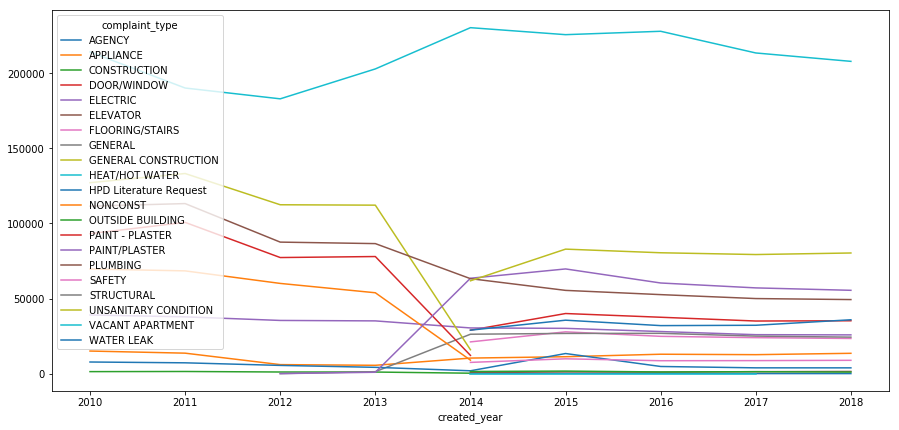

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
df_complaint.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot(ax=ax)

### The above chart proves that The combined Heating and Hets/Hot Water Complaint type is surely the highest one among all complaint types. In recent years the number of complaints of this type is around two times more than the next highest one (General Construction).

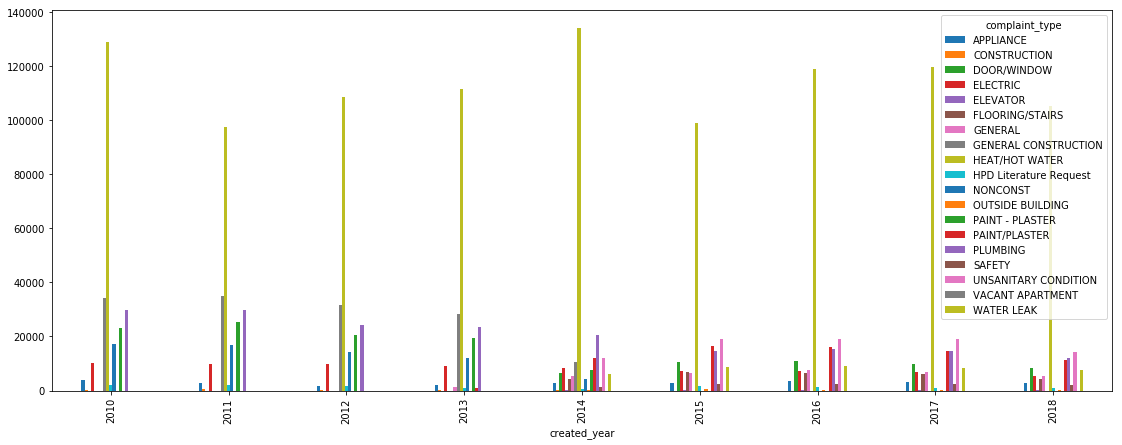

In [17]:
fig, ax = plt.subplots(figsize=(19,7))
df_complaint[df_complaint['created_month'].isin([11, 12,1])].groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot.bar(ax=ax)

### The above chart proves that though there may be little drop in total Heating problem counts from 2016 to 2017 (2018 does not have all data as of this notebook is created) if we consider the winter months together the number of heating complaints are still increasing between 2015 and 2016 and almost same between 2016 and 2017

## Concluding Remarks - Given the above analysis it makes sense for the Department of Housing Preservation and Development in New York City to first focus on solving Heating complaints among other NYC 311 complaint types

In [18]:
df_ht_complaint = df_complaint[df_complaint['complaint_type'] == 'HEAT/HOT WATER']

In [19]:
df_ht_complaint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895752 entries, 13 to 5473241
Data columns (total 18 columns):
address_type              object
borough                   object
city                      object
closed_date               datetime64[ns]
complaint_type            object
created_date              datetime64[ns]
incident_address          object
incident_zip              object
latitude                  object
location_type             object
longitude                 object
open_data_channel_type    object
resolution_description    object
status                    object
street_name               object
unique_key                int64
created_year              int64
created_month             int64
dtypes: datetime64[ns](2), int64(3), object(13)
memory usage: 274.8+ MB


#### Saving the work from this notebook

In [20]:
df_ht_complaint.to_pickle('./DataFromNoteBookQ1.pkl')

In [22]:
client_4583a2827cdd4084aebc758e0b87cb12.upload_file('./DataFromNoteBookQ1.pkl',bucket,'DataFromNoteBookQ1_cos.pkl')

## Exaplanation of Response Score :

### This response is scored as 4. That is because the response is supported by proper data exploration approach, visualization  and reasoning. However, since this response does not have any additional insights it does not get a score of 5.